# **Installing Dependencies**
Installing dependencies, datasets and important Libraries and checking for the avialibilty of GPUs.

In [15]:
!pip install pickle

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [16]:
!pip install tensorflow pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [18]:
!pip install virtualenv

Defaulting to user installation because normal site-packages is not writeable


In [19]:
!pip install virtualenv 

Defaulting to user installation because normal site-packages is not writeable


In [20]:
!venv ~/venv-tfmetal
!pip install tensorflow-metal

zsh:1: command not found: venv
Defaulting to user installation because normal site-packages is not writeable


In [21]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [22]:
!pip install tensorflow-macos

Defaulting to user installation because normal site-packages is not writeable


In [23]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [24]:
# df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))
df = pd.read_csv(r"/Users/Aarish/Downloads/train.csv", on_bad_lines='skip')

In [25]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# **# Preprocessing**
Preprocessing data and performing EDA to Find the MAX_LENGHT and just to have a overview of the given data.

In [26]:
from tensorflow.keras.layers import TextVectorization

In [27]:
toxic=df[df['toxic']==1].count().iloc[0]
severe_toxic=df[df['severe_toxic']==1].count().iloc[0]
obscene=df[df['obscene']==1].count().iloc[0]
threat=df[df['threat']==1].count().iloc[0]
insult=df[df['insult']==1].count().iloc[0]
identity_hate=df[df['identity_hate']==1].count().iloc[0]

print(toxic,severe_toxic,obscene,threat,insult,identity_hate)

15294 1595 8449 478 7877 1405


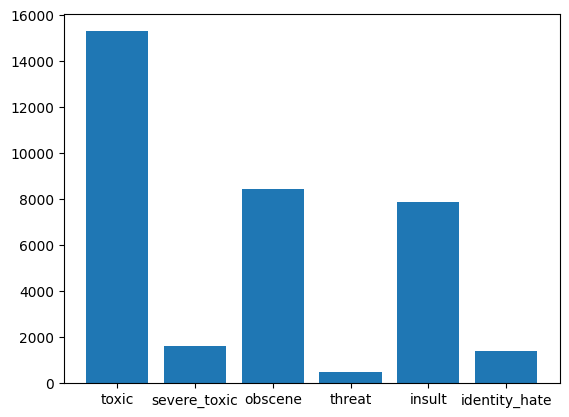

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x_label = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
y_count = np.array([toxic,severe_toxic,obscene,threat,insult,identity_hate])

plt.bar(x_label,y_count)
plt.show()

In [29]:
toxic_comments = df[df['toxic'] == 1]['comment_text'].tolist()
severe_toxic_comments = df[df['severe_toxic'] == 1]['comment_text'].tolist()
obscene_comments = df[df['obscene'] == 1]['comment_text'].tolist()
threat_comments = df[df['threat'] == 1]['comment_text'].tolist()
insult_comments = df[df['insult'] == 1]['comment_text'].tolist()
identity_hate_comments = df[df['identity_hate'] == 1]['comment_text'].tolist()

In [30]:
lengths_of_toxic = [len(comment) for comment in toxic_comments]
lengths_of_severe_toxic = [len(comment) for comment in severe_toxic_comments]
lengths_of_obscene = [len(comment) for comment in obscene_comments]
lengths_of_threat = [len(comment) for comment in threat_comments]
lengths_of_insult = [len(comment) for comment in insult_comments]
lengths_of_identity_hate = [len(comment) for comment in identity_hate_comments]

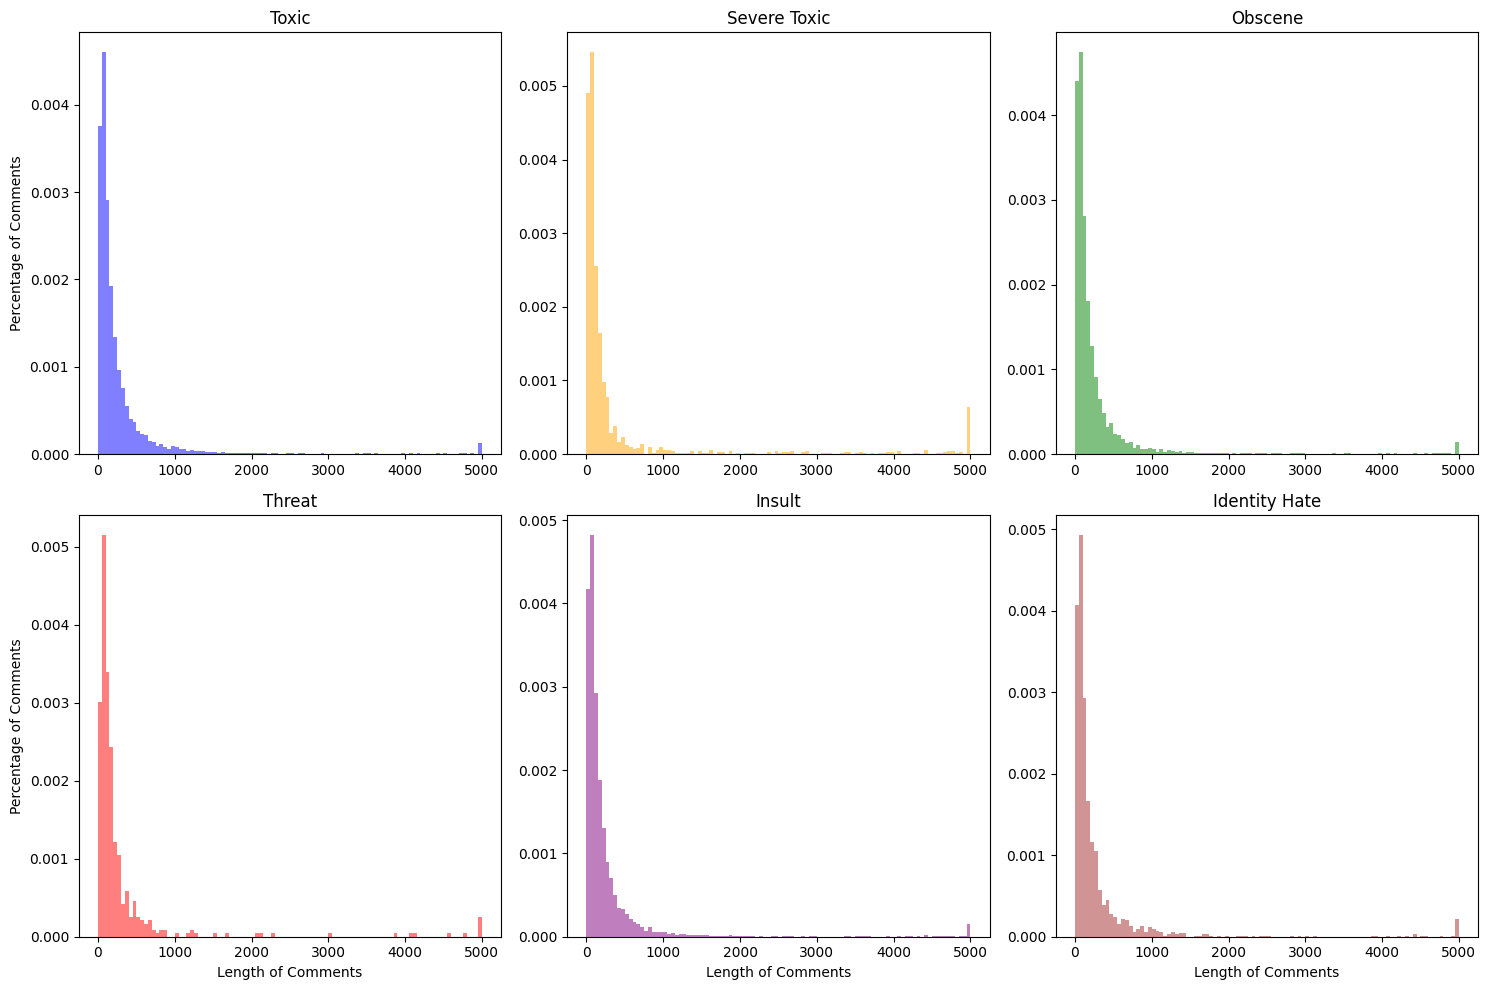

In [31]:
# Define bin edges
bin_edges = np.arange(0, max(max(lengths_of_toxic), max(lengths_of_severe_toxic), max(lengths_of_obscene),
                             max(lengths_of_threat), max(lengths_of_insult), max(lengths_of_identity_hate)) + 50, 50)

# Creating subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plotting for each category
axs[0, 0].hist(lengths_of_toxic, bins=bin_edges, alpha=0.5, color='blue', density=True)
axs[0, 0].set_title('Toxic')
axs[0, 0].set_ylabel('Percentage of Comments')

axs[0, 1].hist(lengths_of_severe_toxic, bins=bin_edges, alpha=0.5, color='orange', density=True)
axs[0, 1].set_title('Severe Toxic')

axs[0, 2].hist(lengths_of_obscene, bins=bin_edges, alpha=0.5, color='green', density=True)
axs[0, 2].set_title('Obscene')

axs[1, 0].hist(lengths_of_threat, bins=bin_edges, alpha=0.5, color='red', density=True)
axs[1, 0].set_title('Threat')
axs[1, 0].set_ylabel('Percentage of Comments')
axs[1, 0].set_xlabel('Length of Comments')

axs[1, 1].hist(lengths_of_insult, bins=bin_edges, alpha=0.5, color='purple', density=True)
axs[1, 1].set_title('Insult')
axs[1, 1].set_xlabel('Length of Comments')

axs[1, 2].hist(lengths_of_identity_hate, bins=bin_edges, alpha=0.5, color='brown', density=True)
axs[1, 2].set_title('Identity Hate')
axs[1, 2].set_xlabel('Length of Comments')

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# Calculate summary statistics for each label/category
labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']
lengths_lists = [lengths_of_toxic, lengths_of_severe_toxic, lengths_of_obscene,
                 lengths_of_threat, lengths_of_insult, lengths_of_identity_hate]

for label, lengths in zip(labels, lengths_lists):
    mean_length = np.mean(lengths)
    median_length = np.median(lengths)
    percentile_95 = np.percentile(lengths, 95)
    print(f'{label}:')
    print(f'Mean length: {mean_length:.2f}')
    print(f'Median length: {median_length:.2f}')
    print(f'95th percentile: {percentile_95:.2f}')
    print()


Toxic:
Mean length: 297.58
Median length: 125.00
95th percentile: 995.35

Severe Toxic:
Mean length: 457.33
Median length: 96.00
95th percentile: 3660.70

Obscene:
Mean length: 289.24
Median length: 112.00
95th percentile: 963.80

Threat:
Mean length: 310.23
Median length: 122.00
95th percentile: 835.15

Insult:
Mean length: 279.57
Median length: 113.00
95th percentile: 852.00

Identity Hate:
Mean length: 311.22
Median length: 115.00
95th percentile: 1040.80



# **Results of EDA **
The plots above show that the comment length is very similar for all labels.
95% of the comments have less than **1000 words** for all labels except for sever_toxic.

In [33]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [34]:
MAX_FEATURES = 200000 # number of words in the vocab
# we are using the max_lenght as 1800, as concluded by the above EDA.

In [35]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [36]:
vectorizer.adapt(X.values)

In [37]:
vectorized_text = vectorizer(X.values)

In [38]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [39]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# Creating different Sequential **Models**


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [41]:
model1 = Sequential()
# Create the embedding layer
model1.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model1.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model1.add(Dense(128, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
# Final layer
model1.add(Dense(6, activation='sigmoid'))

In [42]:
model1.compile(loss='BinaryCrossentropy', optimizer='Adam')
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model1.fit(train, epochs=1, validation_data=val)

2024-05-26 01:21:22.855515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1787s 255ms/step - loss: 0.0837 - val_loss: 0.0478


In [44]:
# import pickle
# with open('./content/sequntial_model.h5', 'wb') as file:
#     pickle.dump(model1, file)
# print("Model saved successfully!")

<Figure size 800x500 with 0 Axes>

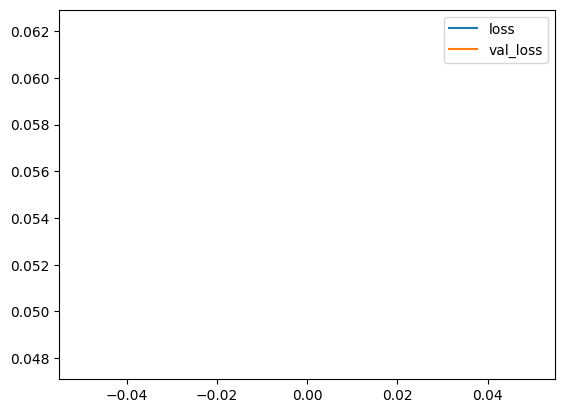

In [45]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [46]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model1.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print("MODEL 1:")
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

2024-05-26 01:52:50.101018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


CNN-LSTM Hybrid

Combining Convolutional Neural Networks (CNN) with LSTM can capture both local features and long-range dependencies in the text.

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional

model2 = Sequential()
model2.add(Embedding(MAX_FEATURES+1, 32))
model2.add(Conv1D(128, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=4))
model2.add(Bidirectional(LSTM(64, activation='tanh')))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='sigmoid'))

model2.compile(loss='BinaryCrossentropy', optimizer='Adam')

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model2.fit(train, epochs=1, validation_data=val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1676s 240ms/step - loss: 0.0817 - val_loss: 0.0422


In [49]:
# import pickle
# with open('./content/CNN-LSTM_model.h5', 'wb') as file:
#     pickle.dump(model2, file)

# print("Model saved successfully!")

<Figure size 800x500 with 0 Axes>

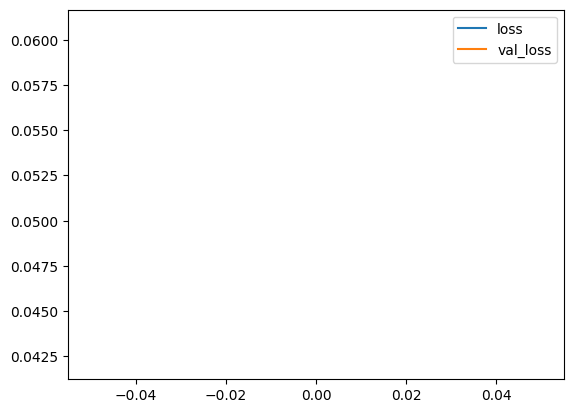

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [51]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model2.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print("MODEL 2:")
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

2024-05-26 02:21:57.863141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# **Stacked LSTM**
Using multiple LSTM layers can help in capturing complex patterns in the text data.

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model3 = Sequential()
model3.add(Embedding(MAX_FEATURES+1, 32))
model3.add(Bidirectional(LSTM(128, return_sequences=True)))
model3.add(Bidirectional(LSTM(64)))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='sigmoid'))

model3.compile(loss='BinaryCrossentropy', optimizer='Adam')

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model3.fit(train, epochs=1, validation_data=val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4391s 629ms/step - loss: 0.0950 - val_loss: 0.0452


In [54]:
# import pickle
# with open('./content/Stacked-LSTM_model.h5', 'wb') as file:
#     pickle.dump(model3, file)

# print("Model saved successfully!")

<Figure size 800x500 with 0 Axes>

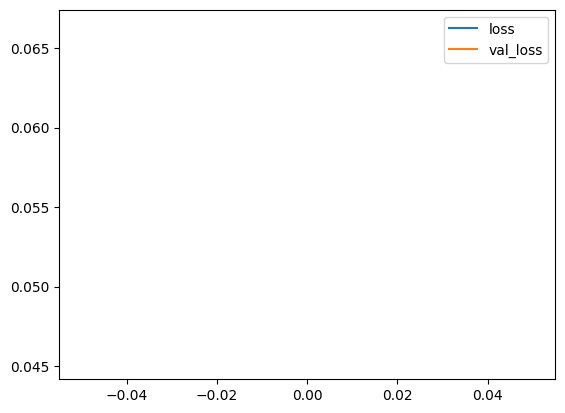

In [55]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [56]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model3.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

print("MODEL 3:")
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2024-05-26 03:37:52.309565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# **GRU (Gated Recurrent Units)**
GRUs are similar to LSTMs but with a slightly different architecture that can sometimes perform better depending on the dataset.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional

model4 = Sequential()
model4.add(Embedding(MAX_FEATURES+1, 32))
model4.add(Bidirectional(GRU(64, activation='tanh')))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(6, activation='sigmoid'))

model4.compile(loss='BinaryCrossentropy', optimizer='Adam')

model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model4.fit(train, epochs=1, validation_data=val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 1672s 239ms/step - loss: 0.0833 - val_loss: 0.0446


In [59]:
# import pickle
# with open('./content/GRU_model.h5', 'wb') as file:
#     pickle.dump(model4, file)

# print("Model saved successfully!")

# **Attention-based BiLSTM**
Adding an attention mechanism on top of a BiLSTM can help the model focus on important parts of the input sequence.

# Making Predictions

# **BERT BASED UNCASED Model by Huggingface**
this model has been pretrained with 110M parameter, we are fine tunning it by converting the data first into a huggingface data type and then coverting it into tf datatype.

In [60]:
!pip install datasets
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [61]:

import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer,BertTokenizer
from datasets import Dataset,DatasetDict

/Users/Aarish/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [62]:
!pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable


In [63]:
model2 = TFAutoModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [64]:
tokenizer2 = AutoTokenizer.from_pretrained("bert-base-uncased")

In [65]:
dataset_fr = Dataset.from_pandas(df)
dataset_fr

Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
    num_rows: 159571
})

In [66]:
def tokenizer_text(example):
    return tokenizer2(example['comment_text'], padding=True, truncation=True, max_length=128)

In [67]:
tokenized_dataset = dataset_fr.map(tokenizer_text, batched=True)
tokenized_dataset

Map: 100%|██████████| 159571/159571 [00:11<00:00, 14072.61 examples/s]


Dataset({
    features: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 159571
})

In [68]:
def prepare_labels(example):
    labels = [example['toxic'], example['severe_toxic'], example['obscene'], example['threat'], example['insult'], example['identity_hate']]
    example['labels'] = labels
    return example

In [69]:
tokenized_dataset = tokenized_dataset.map(prepare_labels, batched=False)

Map: 100%|██████████| 159571/159571 [00:13<00:00, 11802.35 examples/s]


In [70]:
# #removing unessecary labels and cloumns
tokenized_dataset = tokenized_dataset.remove_columns(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
# Organize the dataset into a DatasetDict
dataset_dict = DatasetDict({
    'train': tokenized_dataset.train_test_split(test_size=0.2)['train'],
    'test': tokenized_dataset.train_test_split(test_size=0.2)['test'],
    'validation': tokenized_dataset.train_test_split(test_size=0.1)['test']
})


In [71]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 127656
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 31915
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 15958
    })
})

In [72]:
def dataset_to_tf(ds, batch_size):
    # Convert dataset to dictionary
    ds_dict = ds.to_dict()

    # Extract features and labels
    features = {key: tf.constant(ds_dict[key]) for key in ds_dict if key != 'labels'}
    labels = tf.constant(ds_dict['labels'])

    # Create TensorFlow dataset
    tf_dataset = tf.data.Dataset.from_tensor_slices((features, labels)).shuffle(len(ds)).batch(batch_size)
    return tf_dataset

In [73]:
train_dataset = dataset_to_tf(dataset_dict['train'], batch_size=64)
test_dataset = dataset_to_tf(dataset_dict['test'], batch_size=64)
validation_dataset = dataset_to_tf(dataset_dict['validation'], batch_size=64)

In [74]:
class BERTForMultiLabelClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super(BERTForMultiLabelClassification, self).__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='sigmoid')

    def call(self, inputs):
        outputs = self.bert(inputs)
        pooled_output = outputs[1]  # The pooled output (last_hidden_state[CLS])
        return self.fc(pooled_output)

In [75]:
num_classes = 6  # Assuming 6 classes for the classification task

In [76]:
model = BERTForMultiLabelClassification(model2, num_classes)

In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=1)

1995/1995 ━━━━━━━━━━━━━━━━━━━━ 5226s 3s/step - accuracy: 0.1418 - loss: 0.3067 - val_accuracy: 0.8312 - val_loss: 0.1494


In [79]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy}")

499/499 ━━━━━━━━━━━━━━━━━━━━ 389s 779ms/step - accuracy: 0.8271 - loss: 0.1560
Test Accuracy: 0.8264452219009399


In [80]:
# import pickle
# with open('./content/fine_tuned_bert.h5', 'wb') as file:
#     pickle.dump(model, file)

# print("Model saved successfully!")